# Preprocessing for simulation 2

## Effects at phylum level and order level

@ Aug. 10, Youngwon (youngwon08@gmail.com)


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import softmax as softmax
from scipy.special import expit as sigmoid
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/simulation/s2"
path_genus = "./data/genus48"

def relu(x): 
    x[x <= 0.] = 0.
    return x

## Phylogenetic Tree information

In [3]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
tree_level_list = phylogenetic_tree_info.columns[:-1].tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


In [4]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 23
 Class: 17
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Number', 'Phylum', 'Order', 'Class', 'Family', 'Genus']
------------------------------------------------------------------------------------------


In [5]:
phylogenetic_tree = phylogenetic_tree_info.iloc[:,:-1]
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  5,  0],
       [ 8,  8,  6,  6,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  7,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  5,  0],
       [17, 16,  9,  1,  1],
       [18, 17, 10,  8,  4],
       [19,  4,  3,  3,  2],
       [20, 18, 11,  9,  0],
       [21, 15,  5,  5,  0],
       [22, 19, 12, 10,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  5,  0],
       [25, 15,  5,  5,  0],
       [26, 22, 13,  7,  4],
       [27, 23,  6,  6,  3],
       [28, 24, 14, 11,  6],
       [29, 25, 15, 12,  4],
       [30, 26, 16, 12,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 17, 13,  4],
       [34, 29

In [6]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


### Check Error

In [7]:
maskw_l1 = np.array(pd.read_csv('%s/mw1.csv' % path))
maskw_l2 = np.array(pd.read_csv('%s/mw2.csv' % path))
maskw_l3 = np.array(pd.read_csv('%s/mw3.csv' % path))
maskw_l4 = np.array(pd.read_csv('%s/mw4.csv' % path))
maskw_list = [maskw_l1,maskw_l2,maskw_l3,maskw_l4]
print([np.sum(np.abs(tw-mw)) for tw, mw in zip(tree_weight_noise_list, maskw_list)])

[0.0, 0.0, 0.0, 0.0]


# Binary classification with order level and phylum level selections

Aug. 10, 2019

## Experiments with 1000 replications

## Generating X: microbiome abundance data
* Using the data that Jing made, described in detail by Zhai et al. (2018a,b).
    * $n \times p$ OTU count matrix
    * Aggregating $p_0=2964$ OTUs to $p=48$ genus
* Sample size for each replication: $n = 1000$
    * Training $75%$; Test $25%$

* Phylogenetic tree levels:
    1. Genus: $m^0 = 48$
    1. Family: $m^1 = 40$
    1. Order: $m^2 = 23$
    1. Class: $m^3 = 17$
    1. Phylum: $m^4 = 9$

## Generation Y: a forward propagation approach

1. [Ver 0](https://bpeach.snu.ac.kr:8788/user/muha/notebooks/code/deepbiome/preprocessing_phylogenetic_tree.ipynb#Ver-0:-same-weights-with-same-true-connection-for-each-repeatition): same weights with same true connection for each repeatition
1. [Ver 1](https://bpeach.snu.ac.kr:8788/user/muha/notebooks/code/deepbiome/preprocessing_phylogenetic_tree.ipynb#Ver-1:-change-weights-with-same-true-connection-for-each-repeatition): change weights with same true connection for each repeatition


###  Ver 0: same weights with same true connection for each repeatition

#### (similar to the original version)

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition, 

* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

* Construct the true weights. 
    1. For $i = 1,2,...,4$, $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-5,10) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$
    1. Classification with the K classes:
       - For each k, pick n_k indexes from the phylum nodes to make connection with the disease. 
       - For the binary classification (K=2), choose 3 indexes for the label = 1. 
       - Weights: $w^{5} \in \mathbb{R}^{m^4 \times K}, b^{5} \in \mathbb{R}^{K},$
       $$w^{5}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-1,1) \quad\quad  \text{associated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the disease}
       \end{matrix}\right.$$
       $$b^{5}_{k} \sim \mathcal{N}(-\mathbb{E}(x^{4}), 0.01)$$
       
       * for normally distributed $x$, $\mathbb{E}[sigmoid(x)] \simeq sigmoid(\frac{\mathbb{E}(x)}{\sqrt{1+\pi \sigma^2/8}})$

#### For each repeatition, 

* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer for the classification with the K classes:
    1. $x^{5} = w^{5}x^{4}+b^{5}$
    1. For each class k = 1,...,K,
       $$y_k = \frac{\exp{x^{5}_k}}{\sum_{j=1}^{K}\exp{x^{5}_j}}$$

In [18]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
np.random.seed(10)

print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
order_idx = np.array([5,4,1,9])
phylum_idx = np.array([1,0,2])
true_tree_idx_list = []
for i in range(5):
    idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
    idx_phylum = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
    idx = np.intersect1d(idx_order, idx_phylum)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver0/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver0/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')

yweight_list = []
ybias_list = []
for i in range(len(true_tree_weight_list)):
    yw = np.random.uniform(-5,10, true_tree_weight_list[i].shape).astype(np.float32) * true_tree_weight_list[i] # left only the weights on the true connections to the disease
    yb = np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32)
    yw = np.repeat([yw], x_list.shape[0], axis=0)
    yb = np.repeat([yb], x_list.shape[0], axis=0)
    yweight_list.append(yw)
    ybias_list.append(yb)
    np.save('%s/ver0/solw_%d.npy'%(path,i), yw)
    np.save('%s/ver0/solb_%d.npy'%(path,i), yb)
    
ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
ywc[:3,0] = np.random.uniform(-1,1, 3).astype(np.float32)
ywc[:,0] = ywc[:,0] * (np.sum(true_tree_weight_list[-1], axis=0) > 0).astype(np.float32)
ywc = np.repeat([ywc], x_list.shape[0], axis=0)
ybc = np.random.normal(0,0.1, ywc.shape[-1]).astype(np.float32)
ybc = np.repeat([ybc], x_list.shape[0], axis=0)
np.save('%s/ver0/solw_%d.npy'%(path,len(true_tree_weight_list)), ywc)
# np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

print('-------------------------------------------------------------------------------')
print('Last activation')
palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(nrows =1, ncols=2, figsize=(10,4))
print('-------------------------------------------------------------------------------')
newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    h = np.array(x, dtype=np.float32)
    for i, (yw, yb) in enumerate(zip(yweight_list,ybias_list)):
        yw_noise = yw[fold]
#         yw_noise += np.random.normal(0,0.0001, true_tree_weight_list[i].shape) \
#                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
        h = relu(np.dot(h, yw_noise) + np.repeat([yb[fold]], h.shape[0], axis=0))
    
    h = np.dot(h, ywc[fold])
    pp = h + np.repeat([ybc[fold]], h.shape[0], axis=0)
    p = sigmoid(pp) # imbalanced y
    order = np.argsort(pp[:,0])
    if fold < 10:
        c = palette(fold)
        ax[0].plot(pp[order,0], p[order,0], marker='', c=c, label=fold)
        ax[0].set_title('Before adjusting')
        ax[0].get_xaxis().set_visible(False)
    if verbose: print("[%d fold] mean (sd): %6.3f (%6.3f)" % (fold, np.mean(pp[:,0]), np.std(pp[:,0])))
    
    ybc[fold] = ybc[fold] - np.mean(h, axis=0) # imbalanced y, adjusted
    pp = h + np.repeat([ybc[fold]], h.shape[0], axis=0) 
    p = sigmoid(pp)
    order = np.argsort(pp[:,0])
    if fold < 10:
        ax[1].plot(pp[order,0], p[order,0], marker='', c=c, label=fold)
        ax[1].set_title('After adjusting')
        ax[1].get_xaxis().set_visible(False)
    if verbose: print("[%d fold] (adjusted) mean (sd): %6.3f (%6.3f)" % (fold, np.mean(pp[:,0]), np.std(pp[:,0])))
    
    newy = (p >= 0.5).astype(np.int32)
    newy_all.append(newy[:,0])
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver0/y.csv'%path, index=False)
np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

fig.tight_layout()
print('-------------------------------------------------------------------------------')
print('Data imbalance: %s' % np.sum(np.array(newy_all), axis=0))

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 1  3  5  6  7  9 11 16 17 21 24 25 32 37 38 41 44 46 47]
Family idx: [ 1  3  5  6  7  9 11 15 16 21 27 32 34 38 39]
 Order idx: [1 4 5 9]
 Class idx: [1 4 5]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s2/ver0/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s2/ver0/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s2/ver0/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./data/simulation/s2/ver0/tw_4.npy
-------------------------------------------------------

IndexError: index 1 is out of bounds for axis 1 with size 1

###  Ver 1: change weights with same true connection for each repeatition

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition,
* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

#### For each repeatition, 
* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$ where $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-5,10) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer for the classification with the K classes:
    1. For each class k, pick n_k indexes from the phylum nodes to make connection with the disease. 
       For the binary classification (K=2), choose 2 indexes for the label = 1 and choose 1 indexes from the label = 0. 
    1. $x^{5} = w^{5}x^{4}+b^{5}$ where $w^{5} \in \mathbb{R}^{m^4 \times K}, b^{5} \in \mathbb{R}^{K},$
       $$w^{5}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-1,1) \quad\quad  \text{associated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the disease}
       \end{matrix}\right.$$
       $$b^{5}_{k} \sim \mathcal{N}(-\mathbb{E}(x^{4}), 0.01)$$
    1. For each class k = 1,...,K,
       $$y_k = \frac{\exp{x^{5}_k}}{\sum_{j=1}^{K}\exp{x^{5}_j}}$$

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 1  3  5  6  7  9 11 16 17 21 24 25 32 37 38 41 44 46 47]
Family idx: [ 1  3  5  6  7  9 11 15 16 21 27 32 34 38 39]
 Order idx: [1 4 5 9]
 Class idx: [1 4 5]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s2/ver1/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s2/ver1/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s2/ver1/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./data/simulation/s2/ver1/tw_4.npy
-------------------------------------------------------

/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


-------------------------------------------------------------------------------
Data imbalance: [699 284 448 719 618 701 641 560 407 321 712 703 393 412 749 706 368 706
 557 260 312 564 423 287 537 444 642 390 421 352 639 582 518 473 568 600
 304 654 334 667 550 438 316 608 524 620 251 263 460 458 574 689 395 274
 477 369 418 329 253 296 614 505 420 533 237 620 677 505 507 496 708 611
 428 573 623 327 677 654 706 714 293 218 745 282 524 469 267 797 564 714
 514 597 730 326 770 461 333 284 525 672 499 624 310 683 603 573 247 454
 422 529 340 691 764 452 494 622 548 548 469 443 495 649 456 449 795 467
 705 539 256 378 543 327 604 703 365 240 263 329 317 597 567 531 471 590
 561 312 599 546 448 792 252 436 496 537 283 286 328 754 616 278 279 330
 688 500 683 382 447 598 731 421 311 491 597 732 552 607 765 344 311 683
 460 691 287 414 455 376 720 537 554 749 516 725 518 748 340 787 460 472
 547 778 300 338 274 502 705 260 664 673 779 788 468 423 533 502 574 751
 547 337 685 655 254 665 740

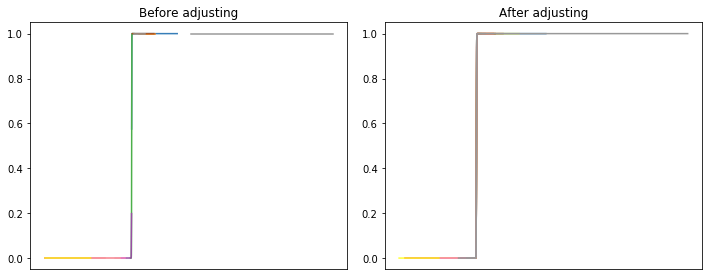

In [9]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
np.random.seed(10)

print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
order_idx = np.array([5,4,1,9])
phylum_idx = np.array([1,0,2])
true_tree_idx_list = []
for i in range(5):
    idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
    idx_phylum = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
    idx = np.intersect1d(idx_order, idx_phylum)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver1/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver1/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')
print('-------------------------------------------------------------------------------')
print('Last activation')
palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(nrows =1, ncols=2, figsize=(10,4))
print('-------------------------------------------------------------------------------')

yweight_list = [[] for i in range(len(true_tree_weight_list)+1)]
ybias_list = [[] for i in range(len(true_tree_weight_list)+1)]
newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    
    imbalance = 0
    while ( (imbalance > 800) or (imbalance < 200) ):
        yw = []
        yb = []
        h = np.array(x, dtype=np.float32)
        for i in range(len(true_tree_weight_list)):
            yw.append(np.random.uniform(-5,10, true_tree_weight_list[i].shape).astype(np.float32)*true_tree_weight_list[i])
            yb.append(np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32))

            yw_noise = yw[-1]
    #         yw_noise += np.random.normal(0,0.01, true_tree_weight_list[i].shape) \
    #                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
            h = relu(np.dot(h, yw_noise) + np.repeat([yb[-1]], h.shape[0], axis=0))

        ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
        ywc[0,0] = np.random.uniform(-1,1, 1).astype(np.float32)
        ywc[1,0] = np.random.uniform(-1,1, 1).astype(np.float32)
        ywc[2,0] = np.random.uniform(-1,1, 1).astype(np.float32)
        ybc = np.random.normal(0,0.1, ywc.shape[-1]).astype(np.float32)

        h = np.dot(h, ywc)
        bfpp = h + np.repeat([ybc], h.shape[0], axis=0)
        bfp = sigmoid(bfpp) # imbalanced y

        ybc = ybc - np.mean(h, axis=0) # imbalanced y, adjusted
        pp = h + np.repeat([ybc], h.shape[0], axis=0) 
        p = sigmoid(pp)

        newy = (p >= 0.5).astype(np.int32)
        imbalance = np.sum(newy)
    
    newy_all.append(newy[:,0])
    for i in range(len(true_tree_weight_list)):
        yweight_list[i].append(yw[i])
        ybias_list[i].append(yb[i])
    yweight_list[len(true_tree_weight_list)].append(ywc)
    ybias_list[len(true_tree_weight_list)].append(ybc)
    
    order = np.argsort(bfpp[:,0])
    if fold < 10:
        c = palette(fold)
        ax[0].plot(bfpp[order,0], bfp[order,0], marker='', c=c, label=fold)
        ax[0].set_title('Before adjusting')
        ax[0].get_xaxis().set_visible(False)
    if verbose: print("[%d fold] mean (sd): %6.3f (%6.3f)" % (fold, np.mean(bfpp[:,0]), np.std(bfpp[:,0])))
    
    order = np.argsort(pp[:,0])
    if fold < 10:
        ax[1].plot(pp[order,0], p[order,0], marker='', c=c, label=fold)
        ax[1].set_title('After adjusting')
        ax[1].get_xaxis().set_visible(False)
    if verbose: print("[%d fold] (adjusted) mean (sd): %6.3f (%6.3f)" % (fold, np.mean(pp[:,0]), np.std(pp[:,0])))
    
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver1/y.csv'%path, index=False)
for i in range(len(true_tree_weight_list)):
    np.save('%s/ver1/solw_%d.npy'%(path,i), yweight_list[i])
    np.save('%s/ver1/solb_%d.npy'%(path,i), ybias_list[i])
np.save('%s/ver1/solw_%d.npy'%(path,len(true_tree_weight_list)), yweight_list[len(true_tree_weight_list)])
np.save('%s/ver1/solb_%d.npy'%(path,len(true_tree_weight_list)), ybias_list[len(true_tree_weight_list)])

fig.tight_layout()
print('-------------------------------------------------------------------------------')
print('Data imbalance: %s' % np.sum(np.array(newy_all), axis=0))

# Check

In [10]:
import os
import json
import numpy as np
import pandas as pd
import copy
import logging
import sys

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES']='3'

import configuration
from loss_and_metric import metric_test, metric_texa_test
import readers
import build_network
import configuration
from utils import file_path_fold, plot_history

logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.DEBUG)
log = logging.getLogger()

/DATA/home/muha/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
fold = 0

In [12]:
model_path = 'simulation_s2_v1/simulation_s2_deepbiome_wo_noise_trueinit/'

config_data = configuration.Configurator('%s/config/path_info.cfg' % model_path, log, verbose=False)
config_data.set_config_map(config_data.get_section_map())
config_network = configuration.Configurator('%s/config/network_info.cfg' % model_path, log, verbose=False)
config_network.set_config_map(config_network.get_section_map())

path_info = config_data.get_config_map()
network_info = config_network.get_config_map()

path_info['data_info']['data_path'] = '/'.join(path_info['data_info']['data_path'].split('/')[2:])
path_info['data_info']['tree_info_path'] = '/'.join(path_info['data_info']['tree_info_path'].split('/')[2:])
path_info['data_info']['count_list_path'] = '/'.join(path_info['data_info']['count_list_path'].split('/')[2:])
path_info['data_info']['count_path'] = '/'.join(path_info['data_info']['count_path'].split('/')[2:])
path_info['data_info']['idx_path'] = '/'.join(path_info['data_info']['idx_path'].split('/')[2:])
try: path_info['data_info']['disease_weight_path'] = '/'.join(path_info['data_info']['disease_weight_path'].split('/')[2:])
except: pass

model_weight_path = './%s/%s' % (model_path, path_info['model_info']['weight'])

reader_class = getattr(readers, network_info['model_info']['reader_class'].strip())
reader = reader_class(log, verbose=True)
data_path = path_info['data_info']['data_path']
count_path = path_info['data_info']['count_path']
x_list = np.array(pd.read_csv(path_info['data_info']['count_list_path'], header=None)[0])
y_path = '%s/%s'%(data_path, path_info['data_info']['y_path'])
idxs = np.array(pd.read_csv(path_info['data_info']['idx_path'])-1, dtype=np.int)

reader.read_dataset('%s/%s'%(count_path, x_list[fold]), y_path, fold)
x_train, x_test, y_train, y_test = reader.get_dataset(idxs[:,fold]) 

network_class = getattr(build_network, network_info['model_info']['network_class'].strip()) 
network = network_class(network_info, path_info['data_info'], log, fold=0)
network.model_compile()

[root    |INFO|readers.py:59] -----------------------------------------------------------------------
[root    |INFO|readers.py:60] Construct Dataset
[root    |INFO|readers.py:61] -----------------------------------------------------------------------
[root    |INFO|readers.py:62] Load data
/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
[root    |INFO|build_network.py:507] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:508] Read phylogenetic tree information from data/genus48/genus48_dic.csv
[root    |INFO|build_network.py:512] Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |

Instructions for updating:
Colocations handled automatically by placer.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[root    |INFO|build_network.py:635] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:56] Build Network
[root    |INFO|build_network.py:57] Optimizer = adam
[root    |INFO|build_network.py:58] Loss = binary_crossentropy
[root    |INFO|build_network.py:59] Metrics = binary_accuracy, sensitivity, specificity, gmeasure


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0         
__________

In [13]:
phat = network.predict(x_train)
yhat = (phat >= 0.5).astype(np.int32)

kernel_lists = network.get_trained_weight()
bias_lists = network.get_trained_bias()
yweight_list, ybias_list = network.load_true_disease_weight_list(path_info['data_info']['disease_weight_path'])

print(np.sum((y_train - yhat[:,0])**2))
for i in range(len(yweight_list)):
    print(np.sum((kernel_lists[i] - yweight_list[i])**2), np.sum((bias_lists[i] - ybias_list[i])**2))

[root    |INFO|build_network.py:191] Prediction start!


750/750 [==============================] - 2s 2ms/step


[root    |INFO|build_network.py:196] Prediction end with time 1.6747112274169922!


0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


## Figure

In [14]:
# Figure
# (+ effect) dark red: Actinobacteria (phylum level)
# (- effect) dark blue: Clostridiales, Bacteroidales (Order level)
# (0 effect): black